In [1]:
import pandas as pd
import joblib as joblib
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

In [2]:

# Load the preprocessed data
df = pd.read_csv("./../data/preprocessed_data.csv")

# Split the dataset into features (X) and the target variable (y)
X = df.drop(columns=['Target_Close', 'Price_Direction'])
y = df['Target_Close']

# Load the trained Random Forest Regressor model
rf_model = joblib.load("trained_model.pkl")

In [3]:
# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=123)

# Print the shapes of the resulting sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Train the Random Forest Regressor model
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

Training set shape: (4279, 13) (4279,)
Validation set shape: (917, 13) (917,)
Test set shape: (917, 13) (917,)


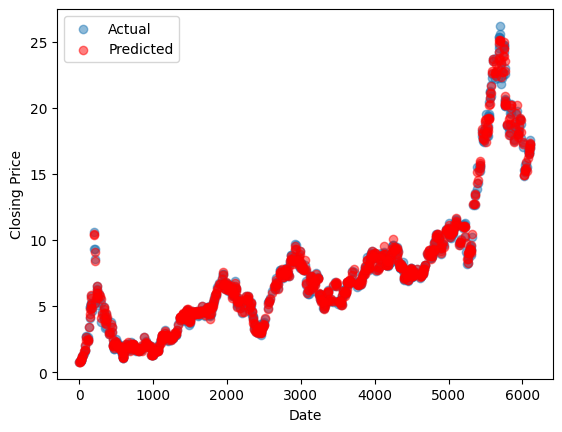

In [4]:
# Plot actual vs. predicted values
plt.scatter(y_val.index, y_val, label='Actual', alpha=0.5)
plt.scatter(y_val.index, y_val_pred, label='Predicted', color='red', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [5]:
# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
r2 = r2_score(y_val, y_val_pred)

# Print evaluation metrics
print(f"Validation Mean Squared Error (MSE): {mse}")
print(f"Validation Mean Absolute Error (MAE): {mae}")
print(f"Validation Root Mean Squared Error (RMSE): {rmse}")
print(f"Validation R-squared (R2) Score: {r2}")

Validation Mean Squared Error (MSE): 0.04125697615099299
Validation Mean Absolute Error (MAE): 0.13171805812148124
Validation Root Mean Squared Error (RMSE): 0.2031181334863852
Validation R-squared (R2) Score: 0.9985381695437036
